# Libraries
---

In [52]:
# Data handling
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Load Model
---

In [2]:
# Load model
with open('model.pkl', 'rb') as model:
    model = pickle.load(model)

# Load data
with open('data_test.pkl', 'rb') as data:
    test = pickle.load(data)

In [ ]:
# Make sure the date is an index
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-06-20 to 2022-06-29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sales_sum  10 non-null     float64
 1   qty_sum    10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


# Forecasting
---

In [48]:
# Indexing future dates
forecast_days = 10

# Future total quantity for future dates
future_qty_sum = [718, 500, 678, 583, 687, 763, 790, 250, 780, 2000]

In [49]:
# Ensure test.index[-1] is a Timestamp and then add Timedelta for weekly forecast
forecast_index = pd.date_range(test.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')

# Create DataFrame for future exogenous variables
future_exog_vars = pd.DataFrame(future_qty_sum, columns=['qty_sum'], index=forecast_index)


# Forecast the future total sales
forecast = model.get_forecast(steps=forecast_days, exog=future_exog_vars)
forecast_mean = forecast.predicted_mean

In [50]:
# Forecast result
forecast_mean

2022-06-20    4.716600e+05
2022-06-21    3.284297e+05
2022-06-22    4.431870e+05
2022-06-23    3.807094e+05
2022-06-24    4.478660e+05
2022-06-25    4.969614e+05
2022-06-26    5.142925e+05
2022-06-27    1.629467e+05
2022-06-28    5.075244e+05
2022-06-29    1.300878e+06
Freq: D, Name: predicted_mean, dtype: float64

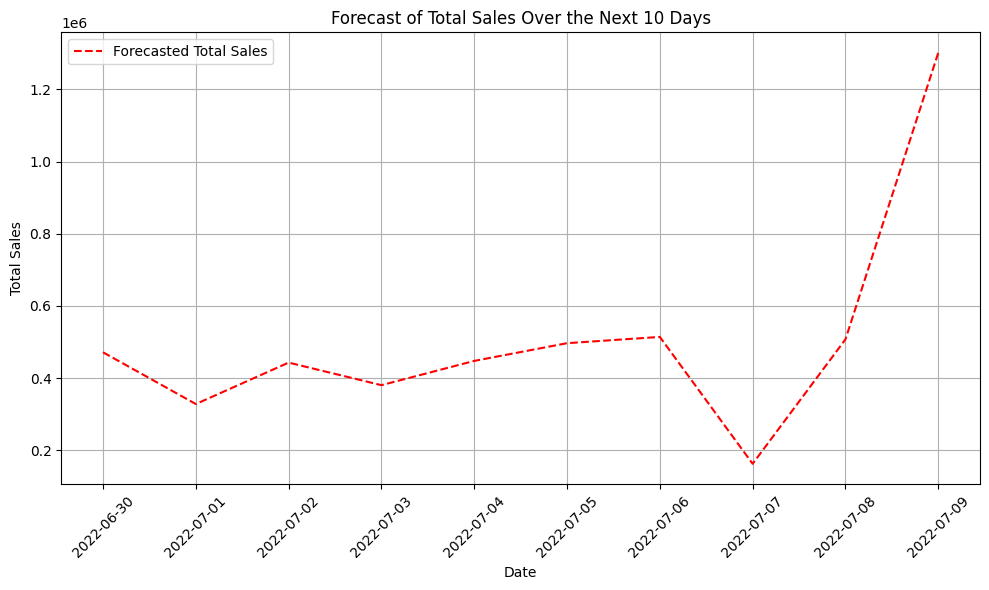

In [51]:
# Visualization Forecast

# Create a plot
plt.figure(figsize=(10, 6))

# Plot forecasted values for the next 4 weeks
plt.plot(forecast_index, forecast_mean, label='Forecasted Total Sales', color='red', linestyle='--')

# Labels and title
plt.title('Forecast of Total Sales Over the Next 10 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()